In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import tensorflow as tf

In [2]:
# 读入数据
df = pd.read_csv('./csv/dot.csv')
x_data = np.array(df[['x1','x2']])
y_data = np.array(df['y_c'])
# 组新的shape属性应该要与原来的配套，如果等于-1的话，那么Numpy会根据剩下的维度计算出数组的另外一个shape属性值。
x_train = np.vstack(x_data).reshape(-1,2)
y_train = np.vstack(y_data).reshape(-1,1)

Y_c = [['red' if y else 'blue'] for y in y_train]

# 转换x的数据类型，否则后面矩阵相乘时会因数据类型问题报错
x_train = tf.cast(x_train,tf.float32)
y_train = tf.cast(y_train,tf.float32)
train_db = tf.data.Dataset.from_tensor_slices((x_train,y_train)).batch(32)


In [3]:
# 生成神经网络的参数、输入层为2个神经元、隐藏层为11个神经元、1层隐藏层，输出层为1个神经元
# 用tf.Variable可保证参数可训练

In [4]:
# 因为有两个输入特征，所以第一层神经网络所以[2,11]第一个参数是2 
# 11 要与下一层的输入【11，1】对相应
w1 = tf.Variable(tf.random.normal([2,11]),dtype=tf.float32)
b1 = tf.Variable(tf.constant(0.01,shape=[11]))

# 神经网络的输出节点的个数要与标签一样，数据集中每一组x1 x2对应一个标签
# 要求【11，1】的1要与b的shape【1】一样
w2 = tf.Variable(tf.random.normal([11,1]),dtype=tf.float32)
b2 = tf.Variable(tf.constant(0.01,shape=[1]))

lr = 0.005
epoch = 800



In [5]:
# epoch是对数据集的循环计数、step是对batch的循环计数
for epoch in range(epoch):
    for step, (x_train,y_train) in enumerate(train_db):
        
        # 在with结构中完成前向传播
        with tf.GradientTape() as tape:
            h1 = tf.matmul(x_train,w1) +b1
            h1 = tf.nn.relu(h1)
            y = tf.matmul(h1,w2) + b2
            
            # 采用均方差计算损失函数
            loss = tf.reduce_mean(tf.square(y_train - y))
            
        # 计算loss对各个参数的梯度
        # 损失函数分别对w1 b1 w2 b2求偏导数
        variables = [w1,b1,w2,b2]
        grads = tape.gradient(loss,variables)
        
        # 实现梯度更新
        # w1 = w1 - lr * w1_grad
        # tape.gradient是自动求导结果与[w1,b1,w2,b2]，索引为0 1 2 3
        w1.assign_sub(lr * grads[0])
        b1.assign_sub(lr * grads[1])
        w2.assign_sub(lr * grads[2])
        b2.assign_sub(lr * grads[3])
    # 每20个epoch，打印loss信息
    if epoch % 20 == 0:
        print("epoch:",epoch,"loss:",loss)

epoch: 0 loss: tf.Tensor(5.1680636, shape=(), dtype=float32)
epoch: 20 loss: tf.Tensor(0.15608537, shape=(), dtype=float32)
epoch: 40 loss: tf.Tensor(0.07839969, shape=(), dtype=float32)
epoch: 60 loss: tf.Tensor(0.058206607, shape=(), dtype=float32)
epoch: 80 loss: tf.Tensor(0.04817142, shape=(), dtype=float32)
epoch: 100 loss: tf.Tensor(0.04213074, shape=(), dtype=float32)
epoch: 120 loss: tf.Tensor(0.038391005, shape=(), dtype=float32)
epoch: 140 loss: tf.Tensor(0.035895113, shape=(), dtype=float32)
epoch: 160 loss: tf.Tensor(0.0344567, shape=(), dtype=float32)
epoch: 180 loss: tf.Tensor(0.033197567, shape=(), dtype=float32)
epoch: 200 loss: tf.Tensor(0.032509524, shape=(), dtype=float32)
epoch: 220 loss: tf.Tensor(0.03216817, shape=(), dtype=float32)
epoch: 240 loss: tf.Tensor(0.03199657, shape=(), dtype=float32)
epoch: 260 loss: tf.Tensor(0.03186363, shape=(), dtype=float32)
epoch: 280 loss: tf.Tensor(0.03180148, shape=(), dtype=float32)
epoch: 300 loss: tf.Tensor(0.031783212, sha

In [7]:
# 预测部分
print("************Predict***********\n")
# xx在-3到3之间步长为0.01 ，yy在-3到3之间步长为0.01生成间隔点
xx,yy = np.mgrid[-3:3:.1,-3:3:.1]
#将xx yy拉直并配对为二维张量
grid = np.c_[xx.ravel(),yy.ravel()]
grid = tf.cast(grid,tf.float32)

# 将网格坐标点喂入神经网络，进行预测，probs为输出

************Predict***********



In [9]:
probs = []
for x_test in grid:
    #使用训练好的参数预测
    h1 = tf.matmul([x_test],w1) + b1
    h1 = tf.nn.relu(h1)
    y = tf.matmul(h1,w2) + b2
    probs.append(y)

In [10]:
# 取第0列给x1 第1列给x2
# 冒号表示切片，逗号表示维度
x1 = x_data[:,0]
x2 = x_data[:,1]

In [13]:
type(x1)

numpy.ndarray

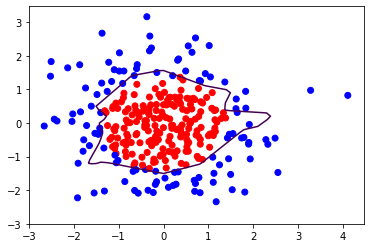

In [15]:
# probs的shape调整为xx的样子
probs = np.array(probs).reshape(xx.shape)
# squeeze 函数：从数组的形状中删除单维度条目，即把shape中为1的维度去掉
# 相当于去掉[['red'],[''blue]],内层括号变为['red','blue']
plt.scatter(x1,x2,color=np.squeeze(Y_c))
# 画出预测值为y的曲线
# contour() 函数绘制等高线，调用 contourf() 函数为等高线图填充颜色。
plt.contour(xx,yy,probs,levels=[.5])
plt.show()

In [18]:
#print(x_data.shape)

In [19]:
# print(x_data)